### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Week 1: Predicting business outcomes with regression!

This week, we will take a deep dive into predictive analytics and, more specifically, regression modelling. You will use this notebook to follow along with the demonstrations throughout the week. 

This is your notebook. Use it to follow along with the demonstrations, test ideas and explore what is possible. The hands-on experience of writing your own code will accelarate your learning!

For more tips: https://jupyter-notebook.readthedocs.io/en/latest/ui_components.html

# 1.1 Advanced Analytics with Python

## A/B testing

### Conduct Power Analysis

In [1]:
# [1] Import the 'statsmodel' for statistical calculations and
# [1a] the 'TTestIndPower' class to calculate the parameters for the analysis:
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower

# [2] Specify the three required parameters for the power analysis:
# [2a] Specify 'alpha'
alpha = 0.05
# [2b] Specify 'power'
power = 0.8
# [2c] Specify 'effect' and calculate the minimum effect.
effect = sms.proportion_effectsize(0.13, 0.15)

# [3] Perform power analysis by using solve_power() function:
# [3a] Specify an instance of 'TTestIndPower'
analysis = TTestIndPower()
# [3b] Calculate the sample size and list the parameters
result = analysis.solve_power(effect, power = power, nobs1 = None,
                             ratio = 1.0, alpha = alpha)

# [4] Print the output up to 3 decimal places (with lead-in text)
print('Sample Size: %.3f' % result)

Sample Size: 4720.435


### Prepare the data in Python

In [1]:
# Install the relevant modules:
!pip install scipy

# Import necessary libraries, packages and classes
import pandas as pd
# Import Python's built-in maths module
import math
import numpy as np
# Import statsmodels stats test and tools
import statsmodels.stats.api as sms
# Import the scipy.stats for more stats functions
import scipy.stats as st
# Import Matplotlib for visualisation tools
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Read the 'ab_data.csv' file
df = pd.read_csv("ab_data.csv")

# View the DataFrame
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# Check the metadata for information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


#### Check for duplicates

In [4]:
# Use Pandas's duplicated() function to check the user_id column
print(df[df.user_id.duplicated()])

        user_id                   timestamp      group landing_page  converted
2656     698120  2017-01-15 17:13:42.602796    control     old_page          0
2893     773192  2017-01-14 02:55:59.590927  treatment     new_page          0
7500     899953  2017-01-07 03:06:54.068237    control     new_page          0
8036     790934  2017-01-19 08:32:20.329057  treatment     new_page          0
10218    633793  2017-01-17 00:16:00.746561  treatment     old_page          0
...         ...                         ...        ...          ...        ...
294308   905197  2017-01-03 06:56:47.488231  treatment     new_page          0
294309   787083  2017-01-17 00:15:20.950723    control     old_page          0
294328   641570  2017-01-09 21:59:27.695711    control     old_page          0
294331   689637  2017-01-13 11:34:28.339532    control     new_page          0
294355   744456  2017-01-13 09:32:07.106794  treatment     new_page          0

[3894 rows x 5 columns]


In [5]:
# Use 'drop_duplicate' to return the Series without the duplicate values
dropped = df.drop_duplicates(subset = "user_id")

dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


#### Remove unnecessary columns

In [6]:
# Use 'dropped.drop' to remove irrelevant columns from the DataFrame
# and specify the column names:
# Specify that 'user_id' and 'timestamp' are columns (i.e. 'axis_1')
final_tab = dropped.drop(["user_id", "timestamp"], axis = 1)

final_tab.head()

,group,landing_page,converted
0,control,old_page,0
1,control,old_page,0
2,treatment,new_page,0
3,treatment,new_page,0
4,control,old_page,1


#### Check for errors

In [7]:
# Use 'crosstab' to compute a simple cross-tabulation between two variables
pd.crosstab(final_tab["group"], final_tab["landing_page"])

landing_page,new_page,old_page
group,,
control,1006,144226
treatment,144314,1038


In [9]:
# [1] Specify groups to be dropped
final_tab_cleaned = final_tab[((final_tab.group == 'control') & \
(final_tab.landing_page == 'old_page')) | \
((final_tab.group == 'treatment') & (final_tab.landing_page == 'new_page'))]

# [2] Print the shape of the new 'final' table
print(final_tab_cleaned.shape)
final_tab_cleaned['group'].value_counts()

(288540, 3)


treatment    144314
control      144226
Name: group, dtype: int64

In [10]:
# Re-check/compute another simple cross-tabulation
pd.crosstab(final_tab_cleaned['group'], final_tab_cleaned['landing_page'])

landing_page,new_page,old_page
group,,
control,0,144226
treatment,144314,0


### Perform random sampling with Pandas

In [16]:
# Obtain a simple random sample for control and treatment groups with n = 4721;
# set random_stategenerator seed at an arbitrary value of 22.

# Obtain a simple random sample for the control group.
control_sample = final_tab_cleaned[final_tab_cleaned['group'] == 'control'].sample \
(n = 4721, random_state = 22)
                                   
# Obtain a simple random sample for the treatment group.
treatment_sample = final_tab_cleaned[final_tab_cleaned['group'] == 'treatment'].sample \
(n = 4721, random_state = 22)

In [17]:
# [1] Join the two samples.
ab_test = pd.concat([control_sample, treatment_sample], axis = 0)

# [2] Reset the A/B index.
ab_test.reset_index(drop = True, inplace = True)

# [3] Print the sample table.
ab_test

,group,landing_page,converted
0,control,old_page,0
1,control,old_page,0
2,control,old_page,0
3,control,old_page,0
4,control,old_page,0
...,...,...,...
9437,treatment,new_page,0
9438,treatment,new_page,0
9439,treatment,new_page,0
9440,treatment,new_page,0


### Analyse the data

#### Calculate basic statistics

In [19]:
# [1] Import library.
from scipy.stats import sem

# [2] Group the ab_test data set by group and aggregate by converted:
conversion_rates = ab_test.groupby('group')['converted']

# [3] Calculate conversion rates by calculating the means of columns STD_p and SE_p:
conversion_rates = conversion_rates.agg([np.mean, np.std, sem])

# [4] Assign names to the three columns.
conversion_rates.columns = ['conversion_rate', 'std_deviationo', 'std_error']

# [5] Round the output to 3 decimal places
conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviationo,std_error
group,,,
control,0.124,0.330,0.005
treatment,0.115,0.319,0.005


#### Calculate statistical significance

In [22]:
# [1] Import proportions_ztest and proportion_confint from statsmodels:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# [2] Create a subset of control and treatment results:
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

# [3] Determine the count of the control_results and treatment_result
# sub-datasets and store them in their respective variables:
n_con = control_results.count()
n_treat = treatment_results.count()

# [4a] Create a variable 'success' with the sum of the two data sets
# in a list format:
successes = [control_results.sum(), treatment_results.sum()]

# [4b] Create a variable 'nobs' which stores the values of
# variables n_con and n_treat in list format:
nobs = [n_con, n_treat]

# [5] Use the imported libraries to calculate the statistical values:
z_stat, pval = proportions_ztest(successes, nobs = nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint \
(successes, nobs = nobs, alpha = 0.05)

# [6a-d] Print the outputs (with lead-in text):
print(f'Z test stat: {z_stat:.2f}')
print(f'P-value: {pval:.3f}')
print(f'Confidence Interval of 95% for control group: [{lower_con:.3f}, \
{upper_con:.3f}]')
print(f'Confidence Interval of 95% for treatment group: [{lower_treat:.3f}, \
{upper_treat:.3f}]')

Z test stat: 1.40
P-value: 0.163
Confidence Interval of 95% for control group: [0.115, 0.134]
Confidence Interval of 95% for treatment group: [0.106, 0.124]


## Conducting a what-if analysis

### Set up

In [1]:
# Install Python Sensitivity Analysis
!pip install sensitivity

In [2]:
# Define classes to contain and encapsulate data.
from dataclasses import dataclass
import pandas as pd
# Import built-in module for generating random numbers.
import random
# Display output inline.
%matplotlib inline
# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer

### Specify inputs

In [3]:
# Create a DataFrame consisting of various classes using Python's 'dataclass()'
# module and Object Oriented programming (OPP):

@dataclass
class ModelInputs:
    # Define the class and specify the default inputs.
    starting_salary: int = 300000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.025
    promo_raise: float = 0.15
    savings_rate: float = 0.20
    interest_rate: float = 0.07
    desired_cash: int = 1500000
        
# Create an instance of the new class with the default inputs.
model_data = ModelInputs()

# Print the results.
model_data

ModelInputs(starting_salary=300000, promos_every_n_years=5, cost_of_living_raise=0.025, promo_raise=0.15, savings_rate=0.2, interest_rate=0.07, desired_cash=1500000)

### Calculate wages

In [4]:
# Get the wage at a given year from the start of the model based on
# the cost of living raises and regular promotions:

def wages_year(data: ModelInputs, year):
    # Every n years we have a promotion, so dividing the years and
    # taking out the decimals gets the number of promotions
    num_promos = int(year / data.promos_every_n_years)
    
    # This is the formula above implemented in Python:
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise) \
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

In [5]:
# Show the first four salaries in the range and print the
# results using the f-string:

for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is ${salary:,.0f}.')

The wage at year 1 is $307,500.
The wage at year 2 is $315,188.
The wage at year 3 is $323,067.
The wage at year 4 is $331,144.


In [6]:
# Change to show the salaries for the first 10 years 
# only and print the results using the f-string:

for i in range(10):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is ${salary:,.0f}.')

The wage at year 1 is $307,500.
The wage at year 2 is $315,188.
The wage at year 3 is $323,067.
The wage at year 4 is $331,144.
The wage at year 5 is $390,336.
The wage at year 6 is $400,094.
The wage at year 7 is $410,097.
The wage at year 8 is $420,349.
The wage at year 9 is $430,858.
The wage at year 10 is $507,874.


### Calculate wealth

In [7]:
# Calculate the cash saved within a given year by first calculating
# the salary at that year then applying the savings rate:

def cash_saved_during_year(data: ModelInputs, year):
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

In [8]:
# Calculate the accumulated wealth for a given year based on
# previous wealth, the investment rate, and cash saved during the year:

def wealth_year(data: ModelInputs, year, prior_wealth):
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

In [10]:
# Start with no cash saved.
prior_wealth = 0
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is ${wealth:,.0f}.')

The wealth at year 1 is $61,500.
The wealth at year 2 is $63,038.
The wealth at year 3 is $64,613.
The wealth at year 4 is $66,229.


In [16]:
# Start with no cash saved, view 10 years.
prior_wealth = 0
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is ${wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth.
    prior_wealth = wealth

The wealth at year 1 is $61,500.
The wealth at year 2 is $128,842.
The wealth at year 3 is $202,475.
The wealth at year 4 is $282,877.


### Calculate retirement

In [12]:
# Create while loop to run through each year, starting with
# no cash saved:

def years_to_retirement(data: ModelInputs, print_output = True):
    # Start with no cash saved.
    prior_wealth = 0
    wealth = 0
    # The 'year' becomes '1' on the first loop.
    year = 0
    
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        if print_output:
            print(f'The wealth at year {year} is ${wealth:,.0f}.')
        # Set the next year's prior wealth to this year's wealth.
        prior_wealth = wealth
        
    # Now we have run the while loop, the wealth must be >= desired_cash
    # (whatever last year was set is the years to retirement), which we can print:
    if print_output:
        # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')
    return year

In [14]:
# Using the default inputs, let's see how long it will take
# to reach over $1.5 million in wealth and retire.
years = years_to_retirement(model_data)

Wealths over time:
The wealth at year 1 is $61,500.
The wealth at year 2 is $128,842.
The wealth at year 3 is $202,475.
The wealth at year 4 is $282,877.
The wealth at year 5 is $380,745.
The wealth at year 6 is $487,417.
The wealth at year 7 is $603,555.
The wealth at year 8 is $729,874.
The wealth at year 9 is $867,136.
The wealth at year 10 is $1,029,411.
The wealth at year 11 is $1,205,583.
The wealth at year 12 is $1,396,691.
The wealth at year 13 is $1,603,844.

Retirement:
It will take 13 years to retire.


## Running a sensitivity and scenario analysis

## Testing a model's sensitivity with different inputs

### Defining functions for calculating the values for sensitivity analysis

In [18]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [19]:
# [1] Define the function that accpets the infividual parameters
# rather than the entire data:
def years_to_retirement_separate_args(
    # [2] List the parameters and set their values.
    starting_salary = 60000, promos_every_n_years = 5, cost_of_living_raise = 0.02,
    promo_raise = 0.15, savings_rate = 0.25, interest_rate = 0.05, desired_cash = 1500000):
    # [3] Update the values of the parameters:
    data = ModelInputs(
        starting_salary = starting_salary,
        promos_every_n_years = promos_every_n_years,
        cost_of_living_raise = cost_of_living_raise,
        promo_raise = promo_raise,
        savings_rate = savings_rate,
        interest_rate = interest_rate,
        desired_cash = desired_cash)
    
    return years_to_retirement(data, print_output = False)

# [4] Call the function.
years_to_retirement_separate_args()

28

### Generate random values for the input variables using list comprehensions

In [20]:
# Use Python's 'list comprehensions' syntax to make it easier to adjust the inputs;
# Use i (the iterator) as a temporary variable to store the values's position in the range:

sensitivity_values = {
    'starting_salary': [i * 10000 for i in range(4, 8)],
    'promos_every_n_years': [i for i in range(4, 8)],
    'cost_of_living_raise': [i / 100 for i in range(1, 4)],
    'promo_raise': [i / 100 for i in range(10, 25, 5)],
    'savings_rate': [i / 100 for i in range(10, 50, 10)],
    'interest_rate': [i / 100 for  i in range(3, 8)],
    'desired_cash': [ i * 100000 for i in range(10, 26, 5)]}

### Running the sensitivity analyser module

In [21]:
# Run the Python's SensitivityAnalyzer with all the assigned inputs:

sa = SensitivityAnalyzer(
    sensitivity_values,
    years_to_retirement_separate_args,
    result_name = 'Years to Retirement',
    reverse_colors = True,
    grid_size = 3)

100%|██████████| 11520/11520 [00:06<00:00, 1764.09it/s]


### Display the results

In [22]:
# Display the results using a DataFrame.
styled_dict = sa.styled_dfs(num_fmt = '{:.1f}')

,4,5,6,7
starting_salary,,,,
40000,35.1,36.8,38.0,38.9
50000,32.4,33.9,35.0,35.8
60000,30.2,31.6,32.6,33.3
70000,28.4,29.7,30.6,31.3


,0.01,0.02,0.03
starting_salary,,,
40000,39.8,37.1,34.7
50000,36.6,34.2,32.0
60000,34.0,31.9,29.9
70000,32.0,29.9,28.2


,0.1,0.15,0.2
starting_salary,,,
40000,39.1,37.1,35.4
50000,36.0,34.2,32.6
60000,33.5,31.9,30.5
70000,31.4,30.0,28.7


,0.1,0.2,0.3,0.4
starting_salary,,,,
40000,48.1,38.3,33.0,29.3
50000,44.9,35.3,30.1,26.7
60000,42.3,33.0,27.9,24.6
70000,40.2,31.0,26.1,22.9


,0.03,0.04,0.05,0.06,0.07
starting_salary,,,,,
40000,42.3,39.4,36.9,34.7,32.7
50000,38.8,36.2,34.0,32.0,30.3
60000,36.0,33.7,31.7,29.9,28.3
70000,33.8,31.7,29.8,28.2,26.7


,1000000,1500000,2000000,2500000
starting_salary,,,,
40000,30.6,35.8,39.6,42.8
50000,27.9,32.9,36.6,39.6
60000,25.8,30.6,34.2,37.2
70000,24.0,28.7,32.3,35.1


,0.01,0.02,0.03
promos_every_n_years,,,
4,33.6,31.4,29.6
5,35.2,32.9,30.9
6,36.4,34.0,31.8
7,37.2,34.8,32.5


,0.1,0.15,0.2
promos_every_n_years,,,
4,33.6,31.4,29.5
5,34.7,32.9,31.4
6,35.5,34.0,32.6
7,36.1,34.8,33.6


,0.1,0.2,0.3,0.4
promos_every_n_years,,,,
4,41.2,32.5,27.8,24.6
5,43.4,34.0,29.0,25.6
6,44.9,35.1,29.9,26.3
7,46.0,36.0,30.5,26.9


,0.03,0.04,0.05,0.06,0.07
promos_every_n_years,,,,,
4,35.1,33.1,31.4,29.7,28.3
5,37.2,34.8,32.8,30.9,29.3
6,38.7,36.1,33.8,31.8,29.9
7,39.9,37.0,34.6,32.3,30.5


,1000000,1500000,2000000,2500000
promos_every_n_years,,,,
4,25.7,30.3,33.7,36.5
5,26.8,31.7,35.3,38.3
6,27.6,32.6,36.5,39.5
7,28.2,33.4,37.3,40.5


,0.1,0.15,0.2
cost_of_living_raise,,,
0.01,37.4,35.5,33.8
0.02,34.9,33.2,31.7
0.03,32.6,31.1,29.8


,0.1,0.2,0.3,0.4
cost_of_living_raise,,,,
0.01,47.1,36.7,31.1,27.4
0.02,43.8,34.3,29.2,25.8
0.03,40.8,32.2,27.5,24.4


,0.03,0.04,0.05,0.06,0.07
cost_of_living_raise,,,,,
0.01,41.0,37.9,35.3,32.9,30.9
0.02,37.5,35.2,33.1,31.2,29.5
0.03,34.6,32.7,31.1,29.5,28.1


,1000000,1500000,2000000,2500000
cost_of_living_raise,,,,
0.01,28.7,34.1,38.1,41.4
0.02,27.0,31.9,35.6,38.6
0.03,25.4,30.0,33.3,36.0


,0.1,0.2,0.3,0.4
promo_raise,,,,
0.1,46.3,36.1,30.6,27.0
0.15,43.8,34.3,29.2,25.8
0.2,41.5,32.8,28.0,24.8


,0.03,0.04,0.05,0.06,0.07
promo_raise,,,,,
0.1,40.1,37.2,34.7,32.4,30.5
0.15,37.6,35.1,33.1,31.2,29.5
0.2,35.4,33.4,31.7,30.0,28.5


,1000000,1500000,2000000,2500000
promo_raise,,,,
0.1,28.2,33.5,37.5,40.7
0.15,27.0,31.9,35.6,38.6
0.2,25.9,30.5,34.0,36.7


,0.03,0.04,0.05,0.06,0.07
savings_rate,,,,,
0.1,50.2,46.7,43.5,40.7,38.2
0.2,38.9,36.3,34.2,32.2,30.4
0.3,32.8,30.8,29.1,27.5,26.1
0.4,28.8,27.2,25.7,24.4,23.2


,1000000,1500000,2000000,2500000
savings_rate,,,,
0.1,36.8,42.4,46.5,49.8
0.2,28.0,33.0,36.8,39.8
0.3,23.3,28.0,31.5,34.4
0.4,20.2,24.6,28.0,30.7


,1000000,1500000,2000000,2500000
interest_rate,,,,
0.03,30.2,36.1,40.5,44.0
0.04,28.4,33.8,37.8,41.0
0.05,26.9,31.8,35.4,38.4
0.06,25.5,30.0,33.3,36.0
0.07,24.2,28.4,31.4,33.9


## Scenario analysis

In [23]:
# The function to calculate 'bad' economy:
bad_economy_data = ModelInputs(
    starting_salary = 100000,
    promos_every_n_years = 8,
    cost_of_living_raise = 0.01,
    promo_raise = 0.07,
    savings_rate = 0.15,
    interest_rate = 0.03)

# The function to calculate 'good' economy:
good_economy_data = ModelInputs(
    starting_salary = 500000,
    promos_every_n_years = 4,
    cost_of_living_raise = 0.03,
    promo_raise = 0.20,
    savings_rate = 0.35,
    interest_rate = 0.06)

cases = {
    'Bad': bad_economy_data,
    'Normal': model_data, # Original inputs were set to assume a 'normal' economy
    'Good': good_economy_data}

In [24]:
# Run the model with the three scenarios and print the results (with a text string):
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output = False)
    print(f'It would take {ytr} years tp retire in a {case_type} economy.')

It would take 40 years tp retire in a Bad economy.
It would take 13 years tp retire in a Normal economy.
It would take 7 years tp retire in a Good economy.


## Assigning probabilities

In [25]:
# Note: These values are arbitrary (i.e. they have been randomly allocated)
# and are only used for demonstration.

case_probabilities = {
    'Bad': 0.2,
    'Normal': 0.5,
    'Good': 0.3}

In [27]:
# Run the model by taking the expected value over the three cases;
# Print the results with a text string:

expected_ytr = 0
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output = False)
    weighted_ytr = ytr * case_probabilities[case_type]
    expected_ytr += weighted_ytr
    
    print(f'It would take {expected_ytr:.0f} years to retire given a \
{case_probabilities["Bad"]:.0%} change of a bad economy and \
{case_probabilities["Good"]:.0%} change of a good economy.')

It would take 8 years to retire given a 20% change of a bad economy and 30% change of a good economy.
It would take 14 years to retire given a 20% change of a bad economy and 30% change of a good economy.
It would take 17 years to retire given a 20% change of a bad economy and 30% change of a good economy.


# 

# 1.2 Linear regression using Python

## Simple linear regression analysis

### 1. Find the line of best fit

In [1]:
# Import Numpy for statistical calculations and Matplotlib for plotting functions:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Regression analysis function:
def estimate_coef(x, y):
    n = np.size(x) # Specify the size or number of points.
    
    # Calculate the mean of x and y:
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Calculate the cross_deviation and deviation around x:
    SS_xy = np.sum(y * x) - n * mean_y * mean_x
    SS_xx = np.sum(x * x) - n * mean_x * mean_x
    
    # Calculate the regression coefficients:
    m = SS_xy / SS_xx
    b = mean_y - m * mean_x
    
    return (b, m)

In [3]:
def plot_regression_line(x, y, b):
    # [1] Use scatterplot to plot the actual points:
    plt.scatter(x, y, color = "g", marker = "o", s = 30)
    
    # [2] Set the predicted response vector using the linear equation:
    y_pred = b[0] + b[1] * x
    
    # [3] Plot the regression line (in red):
    plt.plot(x, y_pred, color = "r")
    
    # [4] Add two labels for clarity:
    plt.xlabel('x')
    plt.ylabel('y')
    
    # [5] Set a function to display the plot:
    plt.show()

### 2. Add data

Estimated coefficients:
c = 8362.602405110887            
m = 12909.488913942112


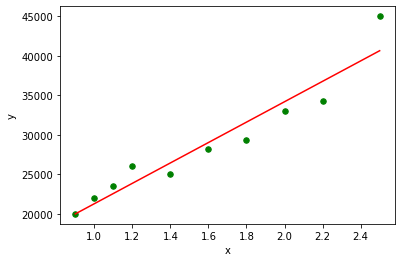

In [6]:
def main():
    # [1] Enter small data set (in this case) manually as an array:
    x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
    y = np.array([20000, 22000, 23500, 26000, 25000, 28250, 29300,
                  33000, 34255, 45000])
    
    # [2] Calculate the coefficients:
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(b[0], b[1]))
    
    # [3] Plot the regression line (i.e. y = mc + c):
    plot_regression_line(x, y, b)
    
main()

### 3. Simplify functions and calculations with NumPy

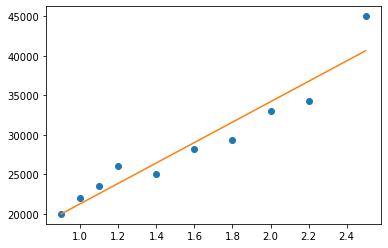

In [8]:
# [1] Re-enter the values of x and y in your Notebook:
x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
y = np.array([20000, 22000, 23500, 26000, 25000, 28250, 29300, 33000, 34255, 45000])

# [2] Create a basic scatterplot.
plt.plot(x, y, 'o')

# [3] Obtain m (slope) and c (intercept) of the linear regression line:
m, c = np.polyfit(x, y, 1)

# [4] Add the linear regression line to the scatterplot:
plt.plot(x, m * x + c)

## The OLD method and the statsmodels package

### 1. Practice the OLD method using the statsmodels package

In [2]:
# Import the 'statsmodels' package along with Numpy, Pandas and Matplotlib:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import and read the data file:
df_test = pd.read_csv("test.csv")

df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [4]:
# Define the dependent variable.
y = df_test['y']

# Define the independent variable.
x = df_test['x']

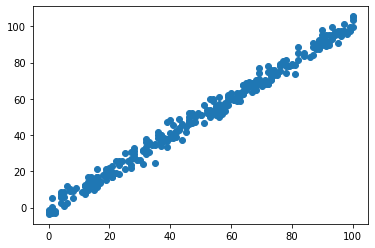

In [5]:
# Check for linearity with scatterplot.
plt.scatter(x, y)

In [6]:
# Create formula and pass through OLS method:
f = 'y ~ x'
test = ols(f, data = df_test).fit()

In [7]:
# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.33e-294
Time:                        18:52:22   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4618      0.360     -1.284      0.200      -1.169       0.246
x              1.0143      0.006    164.598      0.000       1.002       1.026
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.825
Skew:                           0.117   Prob(JB):                        0.662
Kurtosis:                       3.104   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Print useful values

In [8]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
# Extract the standard errors.
print("Standard errors: ", test.bse)
# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -0.461811
x            1.014335
dtype: float64
Standard errors:  Intercept    0.359560
x            0.006162
dtype: float64
Predicted values:  [ 77.64201157  20.83923168  21.85356704  19.82489633  36.05426201
  14.75321955  62.42698124  95.90004796  19.82489633   4.609866
   3.59553065  18.81056097  96.91438332  62.42698124  36.05426201
  14.75321955  65.46998731  13.7388842   87.78536512  69.52732873
  89.81403583  51.26929234  89.81403583  26.92524381  97.92871867
  58.36963982  79.67068228  20.83923168  93.87137725  26.92524381
  99.95738938  30.98258524  33.01125595  80.68501764  27.93957917
  47.21195092  53.29796305  69.52732873  27.93957917  33.01125595
  91.84270654  71.55599944  50.25495698  76.62767622   3.59553065
  37.06859737  70.54166408  68.51299337  40.11160343  35.03992666
  94.88571261  88.79970048  52.28362769  30.98258524  59.38397518
  -0.46181077  39.09726808  64.45565195  69.52732873  57.35530447
  12.72454884  72.57033479  76.62767622  6

### 3. Create a linear equation and plotting regression

In [9]:
# Set the x coefficient to '1.0143' and the constant to '-0.4618'
# to generate the regression table:

y_pred = 1.0143 * df_test['x'] - 0.4618

y_pred

0      77.6393
1      20.8385
2      21.8528
3      19.8242
4      36.0530
        ...   
295    71.5535
296    46.1960
297    55.3247
298    62.4248
299    47.2103
Name: x, Length: 300, dtype: float64

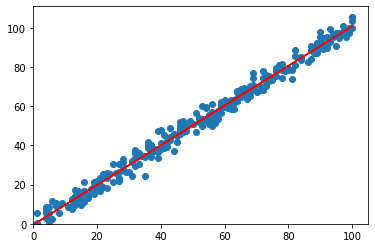

In [10]:
# [1] Plot the data points.
plt.scatter(x, y)

# [2] Plot the regression line (in red).
plt.plot(x, y_pred, color = 'red')

# [3] Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

plt.show()

## Linear regression with scikit-learn

### Install and impor the required modules and packages

In [13]:
# Install the necessary modules.
!pip install numpy
!pip install pandas
!pip install statsmodels
!pip install scipy
!pip install matplotlib

In [14]:
# Import library for statistical analysis.
import statsmodels.api as sm
# Import inbuilt data sets in sklearn library.
from sklearn import datasets
# Import for numerical calculations.
import numpy as np
# Import sklearn's linear model algorithm.
from sklearn import linear_model
# Import Pandas library.
import pandas as pd
# Import for plot generation.
import matplotlib.pyplot as plt

# Import metrics for measuring linear model fit:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

### Create a DataFrame

In [15]:
# Read the 'salary_data.csv' file.
data = pd.read_csv("salary_data.csv")

# Print the table.
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
# More info about the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Determine basic statistics

In [17]:
# Print descriptive statistics.
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Run the regression

In [18]:
# Define the dependent variable.
y = data['Salary'].values.reshape(-1, 1)

# Define the independent variable.
x = data['YearsExperience'].values.reshape(-1, 1)

In [19]:
lm = LinearRegression()

# Fit the model.
lm.fit(x, y)

LinearRegression()

### Make predictions

In [20]:
# Print the target values.
lm.predict(y)

array([[3.71815660e+08],
       [4.36661301e+08],
       [3.56582321e+08],
       [4.11335402e+08],
       [3.76994239e+08],
       [5.35290558e+08],
       [5.68441026e+08],
       [5.14528991e+08],
       [6.09028614e+08],
       [5.40459687e+08],
       [5.97433510e+08],
       [5.27276990e+08],
       [5.38267296e+08],
       [5.39439091e+08],
       [5.77522440e+08],
       [6.42037332e+08],
       [6.23997354e+08],
       [7.85204262e+08],
       [7.68903077e+08],
       [8.87755253e+08],
       [8.66946436e+08],
       [9.28701939e+08],
       [9.57325875e+08],
       [1.07554490e+09],
       [1.03414462e+09],
       [9.97771714e+08],
       [1.10537843e+09],
       [1.06442230e+09],
       [1.15661613e+09],
       [1.15171160e+09]])

In [21]:
## Call the intercept.
lm.intercept_

array([25792.20019867])

### Estimate coefficients

In [22]:
# Estimate coefficients.
lm.coef_

array([[9449.96232146]])

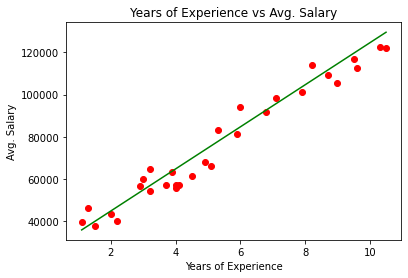

In [33]:
# [1] Create a scatterplot (with red data points).
plt.scatter(x, y, color = 'red')
# [2] Create a regression line in green.
plt.plot(x, lm.predict(x), color = 'green')
# [3] Set the title for the graph.
plt.title("Years of Experience vs Avg. Salary")
# [4] Set the label for the x-axis.
plt.xlabel("Years of Experience")
# [5] Set the label for the y-axis.
plt.ylabel("Avg. Salary")
# [6] Print the graph.
plt.show()

### Apply the linear regression model

In [25]:
# Use the predict() method with an array to call the 
# salaries for each number of years' experience.
predictedSalary = lm.predict([[5], [10], [15], [20], [25], [30]])

# Print the results.
print(predictedSalary)

[[ 73042.01180594]
 [120291.82341322]
 [167541.63502049]
 [214791.44662777]
 [262041.25823505]
 [309291.06984232]]


### Run the regression on subsets

In [30]:
# [1] Import the sklearn module.
from sklearn.model_selection import train_test_split

# [2] Create the subset (50/50).
# Control the shuffling/avoid variation in values between variable.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5,
                                                   random_state = 100)

### Run a regression test and visualise the training data

In [31]:
# Linear regression; fitting the model.
lm.fit(x_train, y_train)

LinearRegression()

In [32]:
# Predict the training set values.
y_pred = lm.predict(x_train)

### Plot and visualise the training data

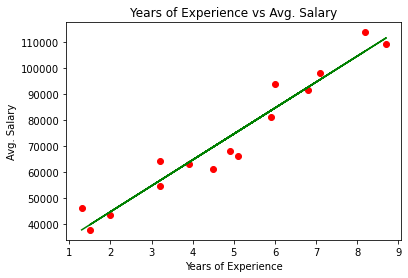

In [34]:
# [1] Create a scatterplot (with red data points).
plt.scatter(x_train, y_train, color = 'red')
# [2] Create a regression line in green.
plt.plot(x_train, y_pred, color = 'green')
# [3] Set the title for the graph.
plt.title("Years of Experience vs Avg. Salary")
# [4] set the label for the x-axis.
plt.xlabel("Years of Experience")
# [5] Set the label for the y-axis.
plt.ylabel("Avg. Salary")
# [6] Print the graph.
plt.show()

In [35]:
# Print R-squared value of the training data.
print(lm.score(x_train, y_train))

0.9382035605624517


### Calculate intercept and coefficient values

In [37]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_)
# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

Intercept value:  [24768.13991346]
Coefficient value:  [[9981.76903593]]


## Testing the model

### Run regression and visualise test data

In [38]:
# Linear regression; fitting the model.
lm.fit(x_test, y_test)

LinearRegression()

### Predict test set values

In [39]:
# Predict the test set values.
y_pred = lm.predict(x_test)

### Visualise

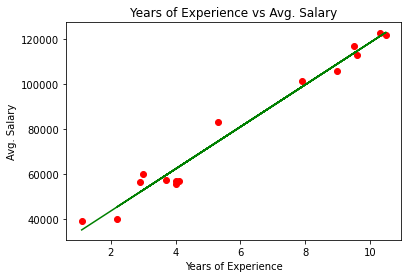

In [40]:
# [1] Create a scatterplot (with red data points).
plt.scatter(x_test, y_test, color = 'red')
# [2] Create a regression line in green.
plt.plot(x_test, y_pred, color = 'green')
# [3] Set the title for the graph.
plt.title("Years of Experience vs Avg. Salary")
# [4] set the label for the x-axis.
plt.xlabel("Years of Experience")
# [5] Set the label for the y-axis.
plt.ylabel("Avg. Salary")
# [6] Print the graph.
plt.show()

### Print R-squared value

In [42]:
# Print R-squared value of the test data.
print(lm.score(x_test, y_test))

0.9742725108027231


### Print intercept and coefficient values

In [43]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_)
# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

Intercept value:  [24929.61625619]
Coefficient value:  [[9333.43003625]]


## Using statsmodels to check homoscedasticity

In [45]:
# Import libraries.
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [46]:
# Import the test data set and run the OLS on the data:
df_test = pd.read_csv("test.csv")

f = 'y ~ x'
test = ols(f, data = df_test).fit()

In [47]:
# Run the Breusch-Pagan test function on the model residuals and x-variables:
test = sms.het_breuschpagan(test.resid, test.model.exog)

In [48]:
# Print the results of the Breusch-Pagan test:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 1.127927731684597, 'LM Test p-value': 0.28821778943913134, 'F-stat': 1.1246365760808066, 'F-test p-value': 0.2897810117091818}


# 1.3 CAPM and multiple regression

## Multiple linear regression

In [49]:
# Import libraries.
import statsmodels.api as sm
from sklearn import datasets
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [50]:
# Import csv file.
hp = pd.read_csv("house_prices.csv")

# Print the DataFrame.
hp.head()

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


In [51]:
# Print more information about the DataFrame.
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     506 non-null    float64
 1   Distance  506 non-null    float64
 2   Value     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [53]:
# Define the variables.
y = hp['Value']
X = hp[['Rooms', 'Distance']]

In [54]:
# Fit the regression model.
mlr = linear_model.LinearRegression()

mlr.fit(X, y)

# Call the predictions for X (array).
mlr.predict(X)

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776,
       24.92052548, 20.99628003, 22.59515685, 17.89792552, 21.43016488,
       24.59312806, 21.29554669, 19.86012857, 20.02480328, 21.19854962,
       18.91052046, 19.79946305, 20.16587486, 15.24036623, 17.62554884,
       16.24441157, 19.82577837, 21.36632302, 18.52848931, 19.65425152,
       16.82067934, 18.81534563, 20.76312523, 24.70679323, 26.17680132,
       17.71571146, 20.84706509, 19.68285587, 17.39216584, 20.85532906,
       19.22540394, 18.42427779, 18.77543693, 19.75391977, 26.04958067,
       29.82538634, 27.7461615 , 22.45651299, 22.82617229, 21.57637181,
       17.86689491, 18.78224174, 21.21771802, 15.7523132 , 17.64542212,
       21.17812468, 22.51593928, 26.00129836, 21.48617409, 20.7648873 ,
       33.41670435, 26.03470634, 29.42393915, 23.26887906, 20.91861579,
       19.42498135, 21.20638654, 25.71803969, 28.7805479 , 32.39778062,
       23.95685233, 19.52974218, 20.27518634, 17.77558538, 20.33

In [55]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X, y))
# Print the intercept.
print("Intercept: ", mlr.intercept_)
# Print the coefficient.
print("Coefficient: ")
# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))

R-squared:  0.4955246476058477
Intercept:  -34.63605017547333
Coefficient: 


[('Rooms', 8.801411828632595), ('Distance', 0.488848536567123)]

In [57]:
# Create a new variable 'New_Rooms' and define it as 5.75.
New_Rooms = 5.75
# Create a new variable 'New_Distance' and define it as 15.2.
New_Distance = 15.2

print('Predicted Value: \n', mlr.predict([[New_Rooms, New_Distance]]))

Predicted Value: 
 [23.40256559]


In [58]:
# Create a new variable 'New_Rooms' and define it as 6.75.
New_Rooms = 6.75
# Create a new variable 'New_Distance' and define it as 15.2.
New_Distance = 15.2

print('Predicted Value: \n', mlr.predict([[New_Rooms, New_Distance]]))

Predicted Value: 
 [32.20397742]


In [60]:
# Split the data in 'train' (80%) and 'test' (20%) subsets:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( \
X, y, test_size = 0.2, random_state = 5)

In [64]:
# Training the model using the 'statsmodels' OLS library:
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(X_test))

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.33e-52
Time:                        22:13:08   Log-Likelihood:                -1352.5
No. Observations:                 404   AIC:                             2711.
Df Residuals:                     401   BIC:                             2723.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.8597      3.141    -10.462      0.0

C:\Users\richa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [65]:
# Run model on 'test' subset.
mlr = LinearRegression()

# Fit the model.
mlr.fit(X_test, y_test)

# Call the predictions for X in the test subset.
y_pred_mlr = mlr.predict(X_test)

# Print the predictions.
print("Prediction for test subset: {}".format(y_pred_mlr))

Prediction for test subset: [39.5007791  26.01220208 23.40571915  7.97760017 36.32952212 12.03353551
 28.71120259 26.60195665 26.25329031 23.55549835 33.39311645 19.5529638
 19.00355373 31.74108834 24.80646556 19.47964643  5.31935431 13.00959399
 13.16804638 16.45968889  9.9881162  22.77207093 41.65869276 23.16761129
 31.08463065 17.53857053 23.35625302 20.93113313 23.23435817 26.88390622
 17.57037584 13.14888443 17.83727856 32.90891385 24.76823466 22.30287688
 25.7837162  17.95773792 42.81614435 29.98205908 20.86835099  9.16135295
 25.43949309 18.91471376 25.41807537 29.06482076  4.2661231  18.64474863
 20.12296035 20.63616287 20.29657713 20.67154466 22.45611771 20.39267666
 16.03630521 24.5691534  37.39196791 24.31316323 26.69493635 19.82799285
 19.39924173 19.58999435 15.91856374 28.31314942 20.44430288 12.49256072
 24.51304292 22.0135639  19.43232398 18.35263298 23.8752249  20.37453461
 16.0758568  27.31107959 14.9534151  28.7072379  17.87693131 14.90371929
 32.16362438 19.03792108

In [66]:
# Print the R-squared value.
print(mlr.score(X_test, y_test) * 100)

71.03671013608054


## Check for multicollinearity

In [70]:
# Add a constant.
x_temp = sm.add_constant(X_train)

# Create an empty DataFrame.
vif = pd.DataFrame()

# Calculate the VIF (variance inflation factor).
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) \
for i in range(x_temp.values.shape[1])]

# Create the feature column.
vif['feature'] = x_temp.columns

# Print the values to two decimal places.
print(vif.round(2))

   VIF Factor   feature
0       83.56     const
1        1.04     Rooms
2        1.04  Distance


C:\Users\richa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
# Call the 'metrics.mean_absolute_error' function.
print('Mean Absolute Error (Final): ', metrics.mean_absolute_error(y_test, y_pred))

# Call the 'metrics.mean_squared_error' function.
print('Mean Squared Error (Final): ', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error (Final):  3.474945101862864
Mean Squared Error (Final):  24.056805405025845
